In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip 

--2023-06-12 11:11:21--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-06-12 11:11:21--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9223b6a5737cb666f6691b7303.dl.dropboxusercontent.com/cd/0/inline/B91WZdyDwWNUYwTCCFU8lAb0GH4y0ALFjbOuAhfjBxANCmLhxXq79wL1Pqjj_D4rdzFCs0NCzHoJ0pkkp2OsTjALzzh7mbn4ODL4vGHM61fctYju7mSQvD_ncGhHbRqi56NnHgfzrDWaY2oNrr-wIHRWlQuz4DVZ8OT7zOh1XW4MQA/file# [following]
--2023-06-12 11:11:22--  https://uc9223b6a5737cb666f6691b7303.dl.dropboxusercontent.com/cd/0/inline/B91WZdyDwWNUYwTCCFU8lAb0GH4y0ALFjbOuAhfjBxANCmLhxXq79wL1Pqjj_D4rdzFC

In [2]:
### zip file, what is done after that?
!unzip /content/training_set.zip
!unzip /content/test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/dogs/dog.1934.jpg  
  inflating: training_set/training_set/dogs/dog.1935.jpg  
  inflating: training_set/training_set/dogs/dog.1936.jpg  
  inflating: training_set/training_set/dogs/dog.1937.jpg  
  inflating: training_set/training_set/dogs/dog.1938.jpg  
  inflating: training_set/training_set/dogs/dog.1939.jpg  
  inflating: training_set/training_set/dogs/dog.194.jpg  
  inflating: training_set/training_set/dogs/dog.1940.jpg  
  inflating: training_set/training_set/dogs/dog.1941.jpg  
  inflating: training_set/training_set/dogs/dog.1942.jpg  
  inflating: training_set/training_set/dogs/dog.1943.jpg  
  inflating: training_set/training_set/dogs/dog.1944.jpg  
  inflating: training_set/training_set/dogs/dog.1945.jpg  
  inflating: training_set/training_set/dogs/dog.1946.jpg  
  inflating: training_set/training_set/dogs/dog.1947.jpg  
  inflating: training_set/training_set/dogs/dog.1948.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


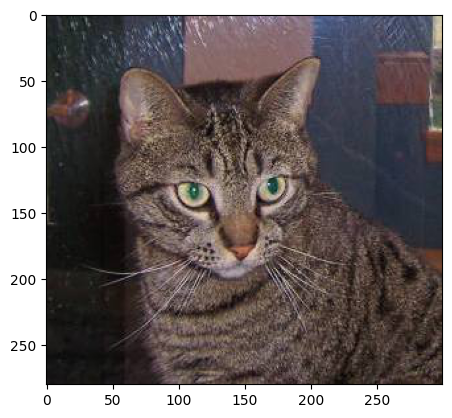

In [3]:
# print  the image in jupyter notebook 
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/training_set/training_set/cats/cat.1.jpg')
implot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


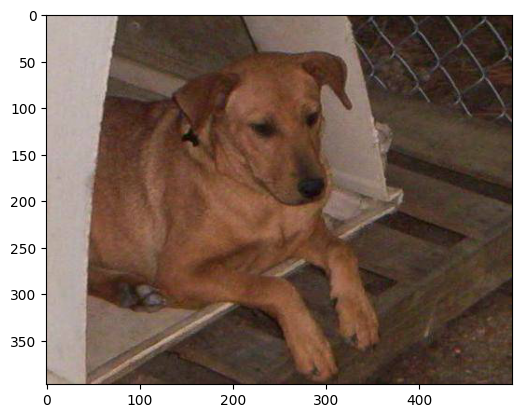

In [4]:
## print the images inline in jupyter notebook
# print  the image in jupyter notebook 
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/training_set/training_set/dogs/dog.100.jpg')
implot = plt.imshow(img)
plt.show()

In [5]:
## Preprocessing steps
## Images are of different sizes - resize images
## cut the image to have the focus on the cat only

In [6]:
## import libraries and process the data 
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
## preprocessing: resize the image, zoom the images 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image

In [7]:
## Initialize parameters 
img_width, img_height = 150, 150
train_data_dir = "/content/training_set/training_set"
validation_data_dir = "/content/test_set/test_set"
nb_train_samples = 100  # batch size while training the algorithm
epochs = 20
batch_size = 32 # data preprocessing 

In [ ]:
# wxhx3 [channels- RGB values - RGB and BGR[PYTORCH], 3Xwxh]
import tensorflow.keras.backend as k
# 3D 150x150x3 [image width, img_height, channels]
# 3x150x150 [channels, image width, img_height]
if k.image_data_format() == 'channel_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, # rescale: normalize the data to a scale of 0 to 1
                                   shear_range= 0.05, #tilting the image
                                   zoom_range =0.15, # zoom the image by 20#
                                   horizontal_flip=True) # x-axis
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  zoom_range=0.2,
                                  shear_range= 0.05)
### fit function on the data
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    classes =['cats','dogs'])
validation_generator = test_datagen.flow_from_directory(validation_data_dir,
                                                    target_size = (img_width, img_height),
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    classes =['cats','dogs']
                                                   )
# why didn't we put classes in the validation part?
# 80 20, many classes, 18 classes, 1-2 classes - validation

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


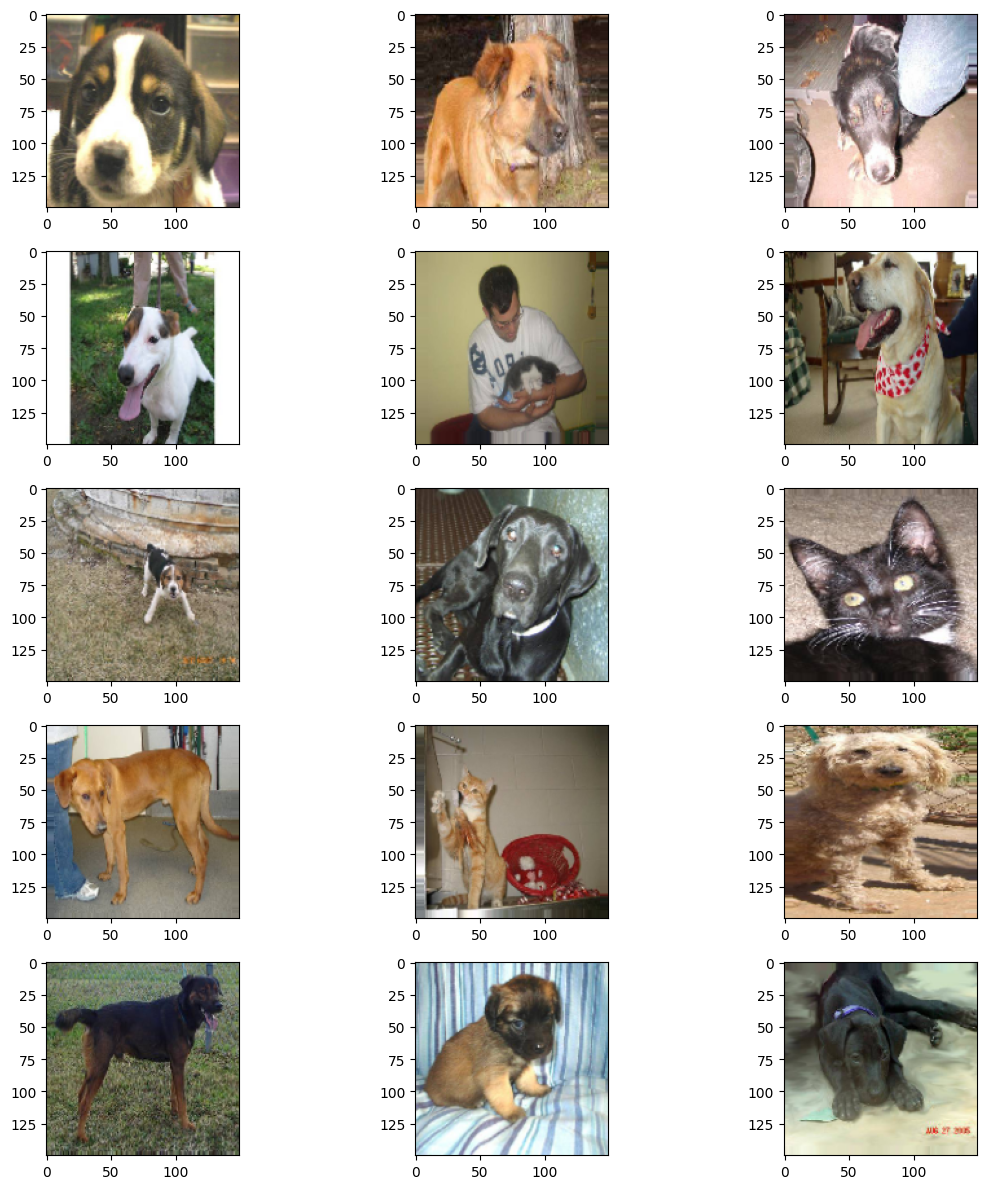

In [11]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch,Y_batch in train_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()


## by zooming are we blurring the background and highlighting area of interest - cat/dog..
## does zoom does that?

In [12]:
## loaded the data
## data preprocessing
## split the data to training and testing

## build a model using CNN
## evaluate the model

## predict using a function for a test data

#### Transformers ####

In [16]:
## early stopping
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 4) #wait for 4 epochs, if validation accuracy is not improving further than stop the training

learningrate_reduction = ReduceLROnPlateau(monitor= 'loss',
                                           patience = 4,
                                           factor=0.2,
                                           min_lr = 0.00001)
callbacks = [earlystop,learningrate_reduction]

model1 = Sequential()
# first block
model1.add(Conv2D(32,(3,3),input_shape=input_shape)) # 3x3 filter, 32 filters #288 weights
model1.add(Activation('relu')) # 148x148x16
model1.add(Conv2D(16,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(16,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.05))
## third block
model1.add(Conv2D(8,(3,3)))
model1.add(Activation('relu')) # 148x148x16
model1.add(MaxPooling2D(pool_size=(2,2)))
## flatten
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))
model1.add(Dropout(0.05))
model1.add(Dense(1)) # output layer
model1.add(Activation('sigmoid')) # 0, 1
model1.summary()
### 9x9 image - 3x3 filter - 5 filters -> 7x7x5
## 150x150 image - 3x3 filters - 16 filters - 148x148x16 [without padding]
# what does 16 correspond to number of filters/kernels?
# what does (3,3) correspond to kernel width and height?
## maxpooling works
## 7x7x3 -->    maxpooling (2,2) -->  4x4x3
## 148x148x16 ->maxpooling (2,2) ---> 74x74x16
## s1: no regularization techniques - validationa accuracy 70% accuracy in 1st epoch
## s2 with regularization techniques - 62% accuracy in 1st epoch [increase/decrease]
## increase epochs
## second block
model1.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

training1 = model1.fit(train_generator,
                     steps_per_epoch= 80,
                     epochs =20,
                     validation_data = validation_generator,
                    callbacks=callbacks
                     )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 146, 146, 16)      4624      
                                                                 
 activation_7 (Activation)   (None, 146, 146, 16)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 16)        2320      
                                                      

KeyboardInterrupt: ignored